---

Tom Curran

Problem set \#6

February 26, 2018

---

**Decision trees (10 points).** 

Joe Biden was the 47th Vice President of the United States. He was the subject of many memes, attracted the attention of Leslie Knope (Parks and Recreation, TV sitcom), and experienced a brief surge in attention due to photos from his youth. The data file biden.csv contains a selection of variables from the 2008 American National Election Studies survey that allow you to test competing factors that may influence attitudes towards Joe Biden. The variables are coded as follows:

* biden: feeling thermometer ranging from 0 to 100. Feeling thermometers are a common metric in survey research used to gauge attitudes or feelings of warmth towards individuals and institutions. They range from 0-100, with 0 indicating extreme coldness and 100 indicating extreme warmth.


* female: =1 if respondent is female, =0 if respondent is male

* age: age of respondent in years, range from 18 to 93

* dem: =1 if respondent is a Democrat, =0 otherwise

* rep: =1 if respondent is a Republican, =0 otherwise

* educ: number of years of formal education completed by respondent, range from 0 to 17 with 17+ representing the first year of grad school and up.

a) Split the data into a training set (70%) and a test set (30%). Be sure to set your seed prior to this part of your code to guarantee reproducibility of results. Use recursive binary splitting to fit a decision tree to the train- ing data, with biden as the response variable and the other variables as predictors. Plot the tree and interpret the results. What is the test MSE?

In [194]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor
#import matplotlib.pyplot as plt
%config IPCompleter.greedy=True
df = pd.read_csv("biden.csv")

df.head()

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1


In [195]:
tree = DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 3)

tree.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [196]:
tree_graph = export_graphviz(tree, out_file =None, rounded = True, filled = True)

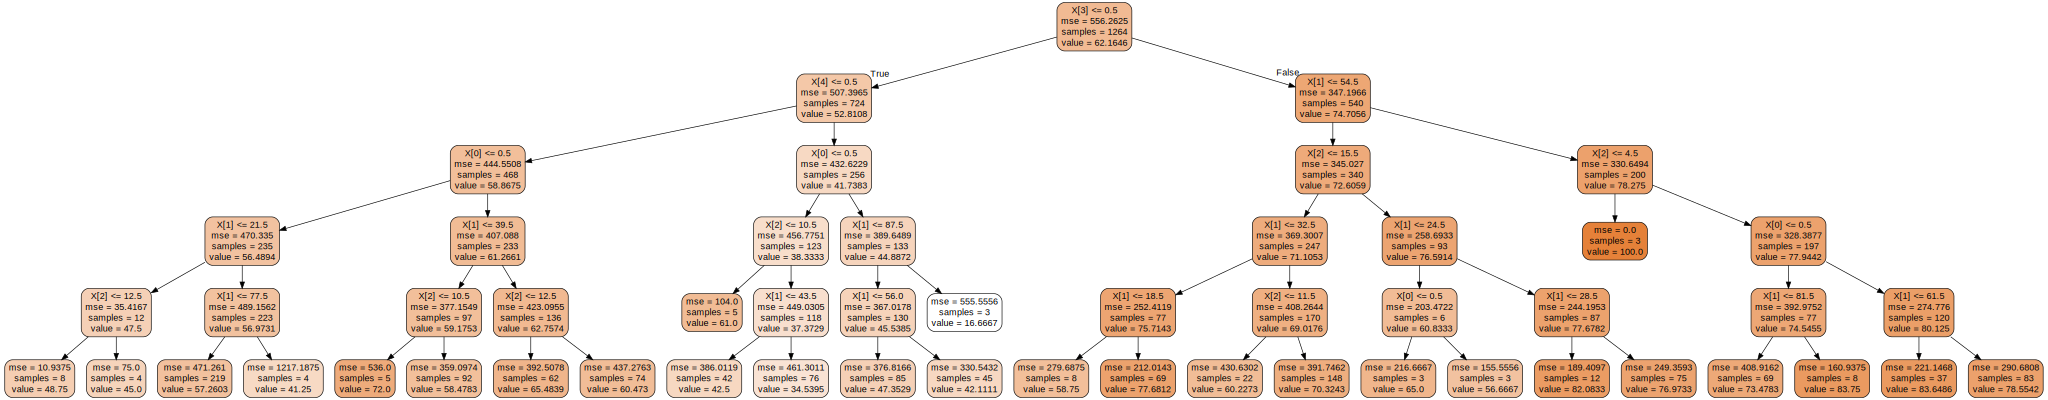

In [197]:
graph = graphviz.Source(tree_graph)
graph.render('tree_graph')
graph

In [127]:
yhat_a = tree.predict(x_test)

mse_tree_a = mean_squared_error(y_test, yhat_a)

print("Test MSE: ", mse_tree_a)

Test MSE:  406.672049146


The first node is the dem variable (x[3]). If the dem variable is true (i.e. dem = 1) than the tree splits into the rep variable (x[4]) which then splits into female if rep = 1 and then goes to the age variable where if age is greater than 21.5 than splits into the level of education. Each of these variables also has additional splits if the node is equal to zero. If dem = 0, then the tree goes to age, where for those greater than 54.5, splits into education where if education is greater than 4.5 it splits into female and if female is true (female = 1) than it goes to age again. Each of these high level nodes again is split into other leafs and branches to further fit the data. However, because there are so many nodes, we run the risk of overfitting our data. Regardless, the primary indicator of what determines a person's attitude towards Biden is their affiliation with the Democratic Party.

In [128]:
tree_defualt = DecisionTreeRegressor()

tree_defualt.fit(x_train, y_train)

tree_defualt = export_graphviz(tree_defualt, out_file =None, rounded = True, filled = True)

tree_defualt_graph = graphviz.Source(tree_defualt)

tree_defualt_graph.render('tree_graph')

tree_defualt_graph

***
b) Leave the control options for tree() at their default values. Now fit another tree to the training data with the following control options: tree(control = tree.control(nobs = # number of rows in the training set, mindev = 0)) Use cross-validation to determine the optimal level of tree complexity, plot the optimal tree, and interpret the results. Does pruning the tree improve the test MSE?

In [129]:

num_iterations = 16
mses = []
for i in range(1,num_iterations):
    tree_b = DecisionTreeRegressor(min_samples_leaf = 5, max_depth = i)
    tree_b.fit(x_train, y_train)
    yhat_b = tree_b.predict(x_test)
    mse_b = mean_squared_error(y_test, yhat_b)
    mses.append(mse_b)
    print("Max Depth = ", i, "MSE = ",mse_b)
print("---------------------------------------------------------------------------------------")
print("The best max_depth value is ",mses.index(min(mses))+1, "which has an MSE of", np.min(mses))

Max Depth =  1 MSE =  420.022452935
Max Depth =  2 MSE =  400.065398184
Max Depth =  3 MSE =  396.193714632
Max Depth =  4 MSE =  404.596023623
Max Depth =  5 MSE =  411.805927372
Max Depth =  6 MSE =  420.546303915
Max Depth =  7 MSE =  435.94288763
Max Depth =  8 MSE =  462.775281251
Max Depth =  9 MSE =  460.249577807
Max Depth =  10 MSE =  470.277009243
Max Depth =  11 MSE =  472.963642527
Max Depth =  12 MSE =  480.784236044
Max Depth =  13 MSE =  477.160792641
Max Depth =  14 MSE =  479.933911633
Max Depth =  15 MSE =  481.850195738
---------------------------------------------------------------------------------------
The best max_depth value is  3 which has an MSE of 396.193714632


In [130]:
tree_b = DecisionTreeRegressor(min_samples_leaf = 5, max_depth = 3)

tree_b.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

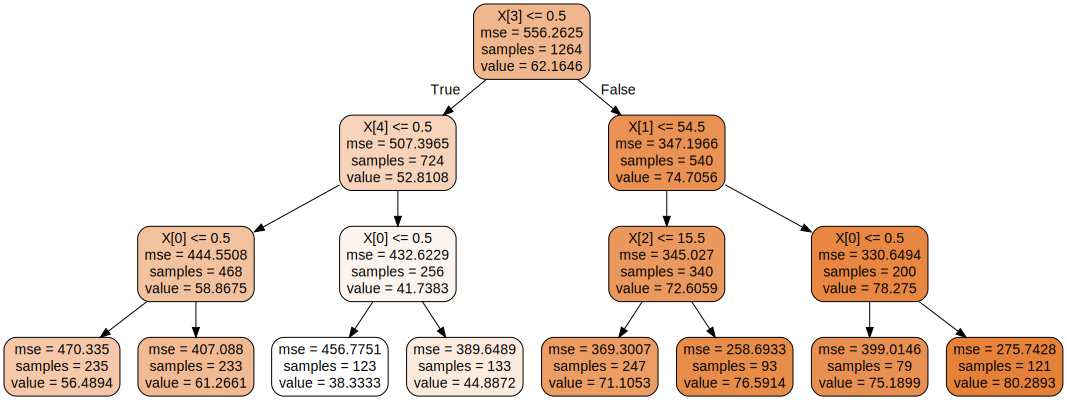

In [131]:
tree_b = export_graphviz(tree_b, out_file =None, rounded = True, filled = True)

tree_b_graph = graphviz.Source(tree_b)

tree_b_graph.render('tree_b')

tree_b_graph

Compared to the tree in 1a, the tree in 1b is more maintainable and easier to interpret. The interpretability of the tree is at the cost of a more detailed model with more end nodes that classify more records. However, having more end nodes does not necessarily mean a better model since have too many nodes probably means that the model has succumbed to over fitting and would not be applicable to future or updated information. 

Like our first tree, we see that Democratic Party affiliation is our most important factor in determining attitude towards Biden. Following dem = 0, we have Republican party affiliation which interestingly depends again on gender for people that are and are not affiliated with the republican party.  For those that are affiliated with the Democrats, we see that age is the next node which is split into the education level if the person is less than 54.5 and if the person is greater than 54.5 it splits into the female variable. 

***
(c) Use the bagging approach to estimate a tree to create a model for predict- ing biden. What test MSE do you obtain? Obtain variable importance measures and interpret the results.

In [198]:
bagging_tree = BaggingRegressor(DecisionTreeRegressor(), 
                                n_estimators = 100,
                               max_samples = 100,
                               bootstrap = True,
                               oob_score = True,
                               random_state = 25)

bagging_tree.fit(x,y)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=100, n_jobs=1, oob_score=True,
         random_state=25, verbose=0, warm_start=False)

In [199]:
bagging_tree.score(x,y)

yhat_bag = bagging_tree.oob_prediction_

bagging_mse = mean_squared_error(y, yhat_bag)

print("Bagging MSE: ", bagging_mse )

Bagging MSE:  405.263562827


In [200]:
importances = np.mean([tree.feature_importances_ for tree in bagging_tree.estimators_], axis=0)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking (using mean):")

features = ['female', 'age', 'dem', 'rep', 'educ']
for f in range(x.shape[1]):
    print(str(f+1), ". ", features[f], ": ",str(importances[indices[f]]))

Feature ranking (using mean):
1 .  female :  0.440843112365
2 .  age :  0.204585294454
3 .  dem :  0.184021781064
4 .  rep :  0.112328510305
5 .  educ :  0.0582213018121


In [201]:
importances = np.std([tree.feature_importances_ for tree in bagging_tree.estimators_], axis=0)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking (using standard deviation):")

features = ['female', 'age', 'dem', 'rep', 'educ']
for f in range(x.shape[1]):
    print(str(f+1), ". ", features[f], ": ",str(importances[indices[f]]))

Feature ranking (using standard deviation):
1 .  female :  0.106773502627
2 .  age :  0.0929835363578
3 .  dem :  0.0658810572494
4 .  rep :  0.0540573284812
5 .  educ :  0.0253071496191


According to the bagging tree model, female is the most important variable by far, followed by age, dem, rep and then education.

***
d) Use the random forest approach to estimate a tree to create a model for predictingbiden. Do this for m=1,m=2,and m=3(thenumberof variables). What test MSE do you obtain in each case? Obtain variable importance measures and interpret the results. Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

In [202]:
from sklearn.ensemble import RandomForestRegressor

tree_rf = RandomForestRegressor(n_estimators=53, 
                                max_features=1,
                                bootstrap=True,
                                oob_score=True, 
                                random_state=15)
tree_rf.fit(x, y)

tree_rf.score(x, y)
yhat_rf = tree_rf.oob_prediction_
rf_mse = mean_squared_error(y, yhat_rf)
print('m = 1, MSE: ', rf_mse)

m = 1, MSE:  536.775016744


In [204]:
rf_importances1 = tree_rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in tree_rf.estimators_],axis=0)

indices = np.argsort(rf_importances1)[::-1]

print("Feature ranking:")

features = ['female', 'age', 'dem', 'rep', 'educ']

for f in range(x.shape[1]):
    print(str(f+1), ". ", features[f], ": ",str(rf_importances1[indices[f]]))

Feature ranking:
1 .  female :  0.521950655595
2 .  age :  0.193998485767
3 .  dem :  0.140657840467
4 .  rep :  0.121110998225
5 .  educ :  0.0222820199472


In [205]:
tree_rf2 = RandomForestRegressor(n_estimators=53, 
                                max_features=2,
                                bootstrap=True,
                                oob_score=True, 
                                random_state=15)
tree_rf2.fit(x, y)

tree_rf2.score(x, y)
yhat_rf2 = tree_rf2.oob_prediction_
rf_mse2 = mean_squared_error(y, yhat_rf2)
print('m = 2, MSE: ', rf_mse2)

m = 2, MSE:  535.286787901


In [206]:
rf_importances2 = tree_rf2.feature_importances_

std = np.std([tree.feature_importances_ for tree in tree_rf2.estimators_],axis=0)

indices = np.argsort(rf_importances2)[::-1]

print("Feature ranking:")

features = ['female', 'age', 'dem', 'rep', 'educ']

for f in range(x.shape[1]):
    print(str(f+1), ". ", features[f], ": ",str(rf_importances2[indices[f]]))

Feature ranking:
1 .  female :  0.505348016919
2 .  age :  0.18967495952
3 .  dem :  0.153193663547
4 .  rep :  0.130094438757
5 .  educ :  0.0216889212562


In [193]:
tree_rf3 = RandomForestRegressor(n_estimators=53, 
                                max_features=3,
                                bootstrap=True,
                                oob_score=True, 
                                random_state=15)
tree_rf3.fit(x, y)

tree_rf3.score(x, y)
yhat_rf3 = tree_rf3.oob_prediction_
rf_mse3 = mean_squared_error(y, yhat_rf3)
print('m = 3, MSE: ', rf_mse3)

m = 3, MSE:  537.282346826


In [207]:
rf_importances3 = tree_rf3.feature_importances_
std = np.std([tree.feature_importances_ for tree in tree_rf3.estimators_],
             axis=0)
indices = np.argsort(rf_importances3)[::-1]

# Print the feature ranking
print("Feature ranking:")

features = ['female', 'age', 'dem', 'rep', 'educ']

for f in range(x.shape[1]):
    print(str(f+1), ". ", features[f], ": ",str(rf_importances3[indices[f]]))


Feature ranking:
1 .  female :  0.482598735879
2 .  age :  0.200202238402
3 .  dem :  0.167957071497
4 .  rep :  0.12275726266
5 .  educ :  0.0264846915617


For all three random forest models (m = 1, m = 2, m = 3) it appears that the female feature of the model is the most important. It should be noted that when m = 1 the MSE is larger than when m = 2 while the MSE is larger than either of those when m = 3. 